In [17]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. 
# A company in this industry employs 40 workers, paying them an average of $12.20 per hour. 
# Can this company be accused of paying substandard wages? 
# Use an α = .01 level test. (Wackerly, Ex.10.18)

# CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [ ]:
# Ho: mu(mean) = $13.20 
# H1: mu(mean) < 13.20

In [5]:
x_bar = 12.20 #sample mean
n = 40 #sample size
sigma = 2.50 # populartion standard deviation
mu =  13.20 #hypothesized value

In [12]:
# calculate test statistics: z-score
z = (x_bar - mu)/ (sigma/np.sqrt(n))
z

-2.5298221281347035

In [13]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000826

In [15]:
alpha = 0.01

if p_value < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


In [ ]:
# EXERCISE 2.
# Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). 
# Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

# CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [19]:
#read in soil dataframe

exe2 = pd.read_csv('/Users/lavondaharrison/Desktop/Clarusway/Assignments/Basic Statistics/soil - Sheet1.csv')
exe2.head(2)

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878


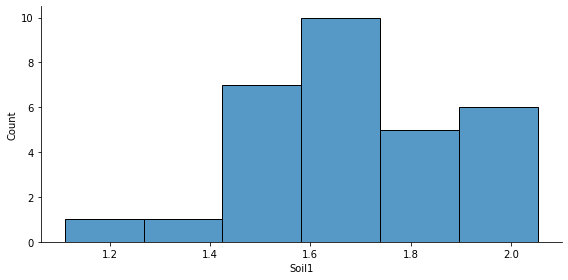

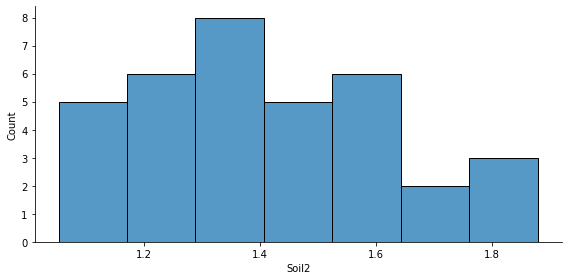

In [22]:
#idenitfy missing data from the soil dataframe
for col in exe2.columns:
  sns.displot(x=col, height = 4, aspect = 2, data=exe2)

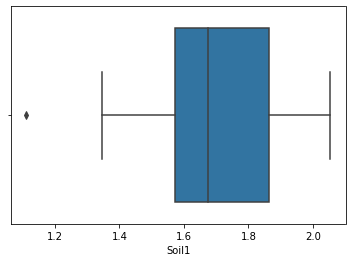

In [23]:
sns.boxplot(x="Soil1", data=exe2);
#outliers are present

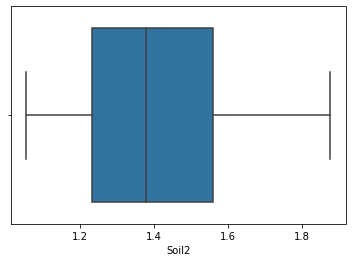

In [24]:
sns.boxplot(x="Soil2", data=exe2);
#no outliers

In [26]:
#Identify any missing data
exe2.Soil1.isnull().sum()

5

In [27]:
#Identify any missing data
exe2.Soil2.isnull().sum()

0

#Hyptothesis testing

In [ ]:
# Ho: mu(mean) = mu
# H1: mu(mean) != mu

In [30]:
#Perform Levene test for equal variances: 
#The small p-value suggests that the populations do not have equal variances.(equal_var = False)
#The large p-value suggests that the populations have equal variances.(equal_var = True)
#Note: use dropna to remove missing values in order to run 
levenetest = stats.levene(exe2.dropna()['Soil1'], exe2['Soil2'])
levenetest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

The large p-value suggests that the populations have equal variances.(equal_var = True)
We reject the null hypothesis and complete a t-test

In [31]:
# average soil 3
np.mean(exe2.Soil1)

1.6918

In [33]:
# average soil 2
np.mean(exe2.Soil2)

1.4171142857142855

In [37]:
indep_ttest = stats.ttest_ind(exe2.dropna()['Soil1'], exe2['Soil2'], equal_var=True)
indep_ttest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352822e-06)

In [38]:
alpha = 0.01

if indep_ttest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


In [ ]:
# EXERCISE 3. 
# The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset
# Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
# Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). 
# Draw side-by-side box plots.
# CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [39]:
#read in soil dataframe

exe3 = pd.read_csv('/Users/lavondaharrison/Desktop/Clarusway/Assignments/Basic Statistics/2015 PISA Test - Sheet1.csv')
exe3.head(2)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311


In [41]:
exe3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [43]:
exe3.shape

(70, 6)

In [40]:
exe3.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


In [42]:
exe3.groupby("Continent_Code").describe().T

Continent_Code                        AF          AS          EU          OC  \
internet_users_per_100 count    2.000000   17.000000   37.000000    2.000000   
                       mean    43.359918   68.455613   77.274888   86.391704   
                       std      7.297226   21.086060   12.425773    2.589686   
                       min     38.200000   21.976068   53.744979   84.560519   
                       25%     40.779959   50.300000   68.632900   85.476112   
                       50%     43.359918   74.000000   76.184000   86.391704   
                       75%     45.939877   84.948353   87.479056   87.307296   
                       max     48.519836   92.884826   98.200000   88.222889   
Math                   count    2.000000   17.000000   37.000000    2.000000   
                       mean   363.212100  466.216647  477.981449  494.559750   
                       std      5.099513   64.356490   35.150403    0.938401   
                       min    359.606200  380.259000  371.311400  493.896200   
                       25%    361.409150  403.833200  464.040100  494.227975   
                       50%    363.212100  459.816000  489.728700  494.559750   
                       75%    365.015050  531.296100  503.722000  494.891525   
                       max    366.818000  564.189700  521.250600  495.223300   
Reading                count    2.000000   17.000000   37.000000    2.000000   
                       mean   355.457400  454.059682  476.164608  506.085650   
                       std      7.916909   57.048962   37.720545    4.504341   
                       min    349.859300  346.549000  351.741500  502.900600   
                       25%    352.658350  408.102200  452.514300  504.493125   
                       50%    355.457400  433.542300  487.250100  506.085650   
                       75%    358.256450  508.690500  499.814600  507.678175   
                       max    361.055500  535.100200  526.424700  509.270700   
Science                count    2.000000   17.000000   37.000000    2.000000   
                       mean   381.074250  467.945847  478.299381  511.648700   
                       std      7.536556   56.671371   34.450616    2.340241   
                       min    375.745100  386.485400  383.682400  509.993900   
                       25%    378.409675  417.611200  460.774900  510.821300   
                       50%    381.074250  456.483600  490.225000  511.648700   
                       75%    383.738825  523.277400  501.936900  512.476100   
                       max    386.403400  555.574700  534.193700  513.303500   

Continent_Code                        SA  
internet_users_per_100 count    7.000000  
                       mean    60.180494  
                       std      9.772455  
                       min     40.900000  
                       25%     57.116462  
                       50%     64.289000  
                       75%     66.321532  
                       max     69.198471  
Math                   count    7.000000  
                       mean   402.887700  
                       std     18.128894  
                       min    377.069500  
                       25%    388.102200  
                       50%    409.033300  
                       75%    417.617650  
                       max    422.671400  
Reading                count    7.000000  
                       mean   425.359229  
                       std     19.709688  
                       min    397.541400  
                       25%    416.126900  
                       50%    425.303100  
                       75%    431.922700  
                       max    458.570900  
Science                count    7.000000  
                       mean   421.747186  
                       std     18.470319  
                       min    396.683600  
                       25%    408.205450  
                       50%    424.590500  
                       75%

In [44]:
df_math = exe3.groupby("Continent_Code").describe()["Math"]
df_math

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,363.212100,5.099513,359.6062,361.409150,363.21210,365.015050,366.8180
AS,17.0,466.216647,64.356490,380.2590,403.833200,459.81600,531.296100,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.040100,489.72870,503.722000,521.2506
OC,2.0,494.559750,0.938401,493.8962,494.227975,494.55975,494.891525,495.2233
SA,7.0,402.887700,18.128894,377.0695,388.102200,409.03330,417.617650,422.6714


In [45]:
exe3[(exe3['Continent_Code'] == "AS") | (exe3['Continent_Code'] == "EU")][['Math','Continent_Code']]

,Math,Continent_Code
0,413.1570,EU
1,427.4827,AS
4,496.7423,EU
5,506.9844,EU
6,441.1899,EU
9,521.2506,EU
11,531.2961,AS
14,437.1443,EU
15,492.3254,EU
16,505.9713,EU


In [48]:
exe3[(exe3['Continent_Code'] == "AS")] ['Math']

1     427.4827
11    531.2961
25    403.8332
27    547.9310
30    386.1096
33    469.6695
35    380.2590
36    532.4399
37    459.8160
38    524.1062
39    396.2497
43    543.8078
49    446.1098
56    402.4007
59    564.1897
63    415.4638
69    494.5183
Name: Math, dtype: float64

In [49]:
exe3[(exe3['Continent_Code'] == "EU")] ['Math']

0     413.1570
4     496.7423
5     506.9844
6     441.1899
9     521.2506
14    437.1443
15    492.3254
16    505.9713
17    511.0876
20    485.8432
21    519.5291
22    511.0769
23    492.9204
24    492.4785
26    453.6299
28    464.0401
29    476.8309
31    503.7220
32    488.0332
34    489.7287
40    478.3834
41    485.7706
42    482.3051
44    419.6635
46    371.3114
47    478.6448
48    417.9341
50    512.2528
51    501.7298
54    504.4693
55    491.6270
57    443.9543
58    494.0600
60    475.2301
61    509.9196
62    493.9181
66    420.4540
Name: Math, dtype: float64

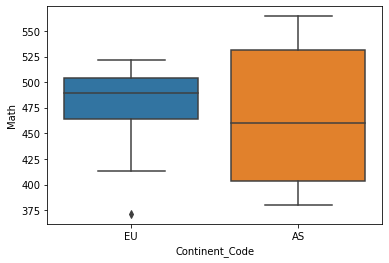

In [50]:
#boxplot
sns.boxplot(y='Math', x='Continent_Code', data = exe3[(exe3['Continent_Code'] == "AS") | (exe3['Continent_Code'] == "EU")][['Math','Continent_Code']]);

In [ ]:
# Ho: mu(mean) = mu
# H1: mu(mean) != mu

In [56]:
stats.ttest_ind(exe3[exe3['Continent_Code']== "EU"]["Math"],
exe3[exe3['Continent_Code']== "AS"]["Math"], equal_var = True)


Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [ ]:
# EXERCISE 4.  
# A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. 
# To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. 
# Did the exercise and diet program have an impact on customers' weight loss?
# Use an α = .01 level test.  Weight Dataset

# CHECK: statistic=2.67808348404993, pvalue=0.00900646517506627

In [57]:
#read in soil dataframe

exe4 = pd.read_csv('/Users/lavondaharrison/Desktop/Clarusway/Assignments/Basic Statistics/weight - Sheet1.csv')
exe4.head(2)

,ID,starting,ending,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1.0,76.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,81.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
exe4.shape

(268, 19)

In [59]:
exe4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           15 non-null     float64
 1   starting     15 non-null     float64
 2   ending       15 non-null     float64
 3   Unnamed: 3   1 non-null      object 
 4   Unnamed: 4   1 non-null      object 
 5   Unnamed: 5   6 non-null      object 
 6   Unnamed: 6   3 non-null      object 
 7   Unnamed: 7   3 non-null      object 
 8   Unnamed: 8   1 non-null      object 
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  3 non-null      object 
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  1 non-null      object 
 14  Unnamed: 14  1 non-null      object 
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  1 non-null      object 
dtypes: float

In [72]:
exe4.drop(exe4.columns[[3,4,5,6,7,8,9,10]], axis = 1, inplace = True)


In [75]:
exe4.head(10)

,ID,starting,ending
0,1.0,76.0,72.0
1,2.0,81.0,82.0
2,3.0,86.0,84.0
3,4.0,71.0,71.0
4,5.0,88.0,83.0
5,6.0,78.0,74.0
6,7.0,76.0,70.0
7,8.0,81.0,80.0
8,9.0,79.0,78.0
9,10.0,77.0,79.0


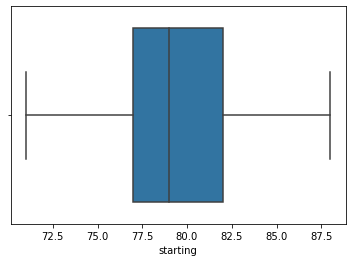

In [73]:
sns.boxplot(x="starting", data=exe4);
#outliers are present

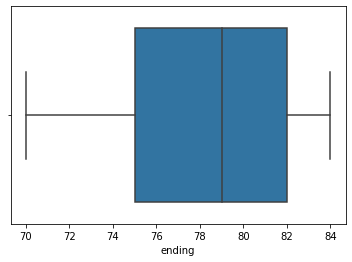

In [74]:
sns.boxplot(x="ending", data=exe4);
#outliers are present

In [76]:
# We can see both male and female survivors using a crosstab
crosstab = pd.crosstab(exe4.starting, exe4.ending)
crosstab

ending,70.0,71.0,72.0,74.0,76.0,77.0,78.0,79.0,80.0,82.0,83.0,84.0
starting,,,,,,,,,,,,
71.0,0,1,0,0,0,0,0,0,0,0,0,0
76.0,1,0,1,0,0,0,0,0,0,0,0,0
77.0,0,0,0,0,1,0,0,1,0,0,0,0
78.0,0,0,0,1,0,0,0,0,0,0,0,0
79.0,0,0,0,0,0,1,1,0,0,0,0,0
81.0,0,0,0,0,0,0,0,0,1,1,1,0
83.0,0,0,0,0,0,0,0,0,1,1,0,0
86.0,0,0,0,0,0,0,0,0,0,0,0,1
88.0,0,0,0,0,0,0,0,0,0,0,1,0


In [77]:
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('stat=%.3f, p=%.4f' % (stat, p))

stat=97.500, p=0.2291


In [78]:
if p > 0.01:
	print('Fail to reject Ho')
else:
	print('We reject the null hypothesis. exercise and diet program are dependent on customer weight loss')

Fail to reject Ho
